### Khai báo thư viện

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [0]:
url = "https://gist.githubusercontent.com/AramisAraujo/80c3026b561c6e27850c428b8e6e7b62/raw/7409762cb942e94f96b49a6a044877faf059b145/salesWinLoss.csv"
sales_data = pd.read_csv(url)
sales_data_original = sales_data

### Thông tin loại biến

In [45]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 19 columns):
Opportunity Number                         78025 non-null int64
Supplies Subgroup                          78025 non-null object
Supplies Group                             78025 non-null object
Region                                     78025 non-null object
Route To Market                            78025 non-null object
Elapsed Days In Sales Stage                78025 non-null int64
Opportunity Result                         78025 non-null object
Sales Stage Change Count                   78025 non-null int64
Total Days Identified Through Closing      78025 non-null int64
Total Days Identified Through Qualified    78025 non-null int64
Opportunity Amount USD                     78025 non-null int64
Client Size By Revenue                     78025 non-null int64
Client Size By Employee Count              78025 non-null int64
Revenue From Client Past Two Years         78025 non-n

### Xem các biến

In [46]:
sales_data.head(10)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.696360,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.000000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.000000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.000000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.000000,0.141125,0.000000,4
5,1692390,Shelters & RV,Performance & Non-auto,Pacific,Reseller,89,Loss,3,114,0,232522,5,1,0,Unknown,0.000000,0.000877,0.000000,5
6,1935837,Garage & Car Care,Car Accessories,Pacific,Fields Sales,111,Won,12,112,112,20001,4,5,0,Unknown,0.308863,0.568487,0.122650,2
7,1952571,Exterior Accessories,Car Accessories,Pacific,Fields Sales,82,Loss,6,70,70,450000,1,1,0,Known,0.263610,0.736390,0.000000,6
8,1999486,Batteries & Accessories,Car Accessories,Northwest,Fields Sales,68,Loss,8,156,156,250000,1,5,0,None,0.000000,0.562821,0.437179,6
9,2052337,Exterior Accessories,Car Accessories,Pacific,Reseller,18,Loss,7,50,50,55003,1,1,0,Unknown,0.000000,0.585317,0.414683,4


### Xem dữ liệu rỗng


In [47]:
number_of_nulls_by_column = sales_data.isnull().sum().sort_values(ascending=False)
percent_of_nulls = sales_data.isnull().sum()/sales_data.isnull().count()*100
percent_rounded = (round(percent_of_nulls, 1)).sort_values(ascending=False)
missing_data = pd.concat([number_of_nulls_by_column, percent_rounded], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Deal Size Category,0,0.0
Total Days Identified Through Closing,0,0.0
Supplies Subgroup,0,0.0
Supplies Group,0,0.0
Region,0,0.0
Route To Market,0,0.0
Elapsed Days In Sales Stage,0,0.0
Opportunity Result,0,0.0
Sales Stage Change Count,0,0.0
Total Days Identified Through Qualified,0,0.0


### Tương quan của các biến

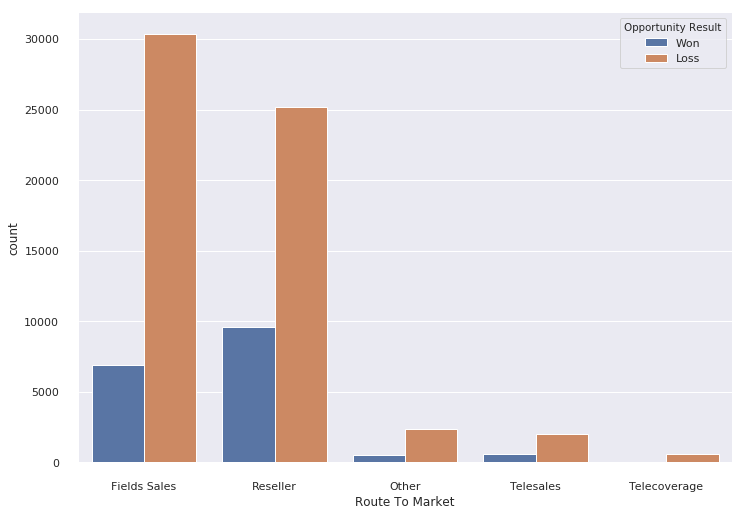

In [48]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result')

sns.despine(offset=10, trim=True)


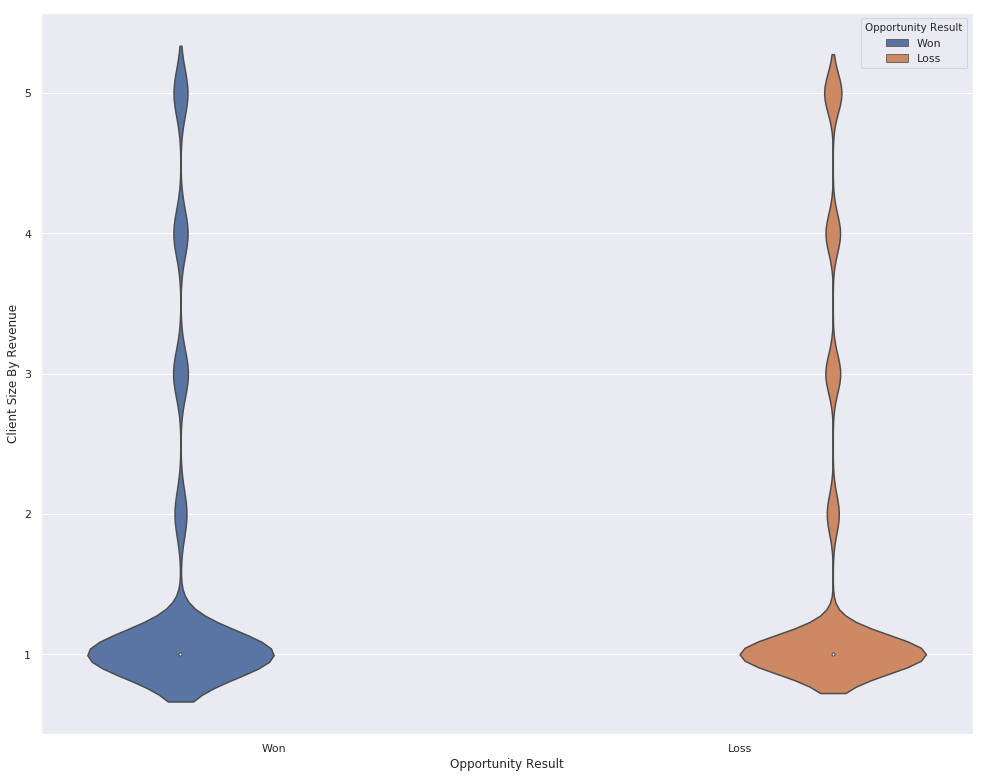

In [49]:
sns.set(rc={'figure.figsize':(16.7,13.27)})
sns.violinplot(x="Opportunity Result",y="Client Size By Revenue", hue="Opportunity Result", data=sales_data);
plt.show()



**Mối quan hệ giữa số lượng nhân viên làm việc trong một chiến dịch và liệu chiến dịch đó có đối thủ cạnh tranh (được biết hay không), cho thấy sự mất mát hay được lợi, được thể hiện theo khu vực.**

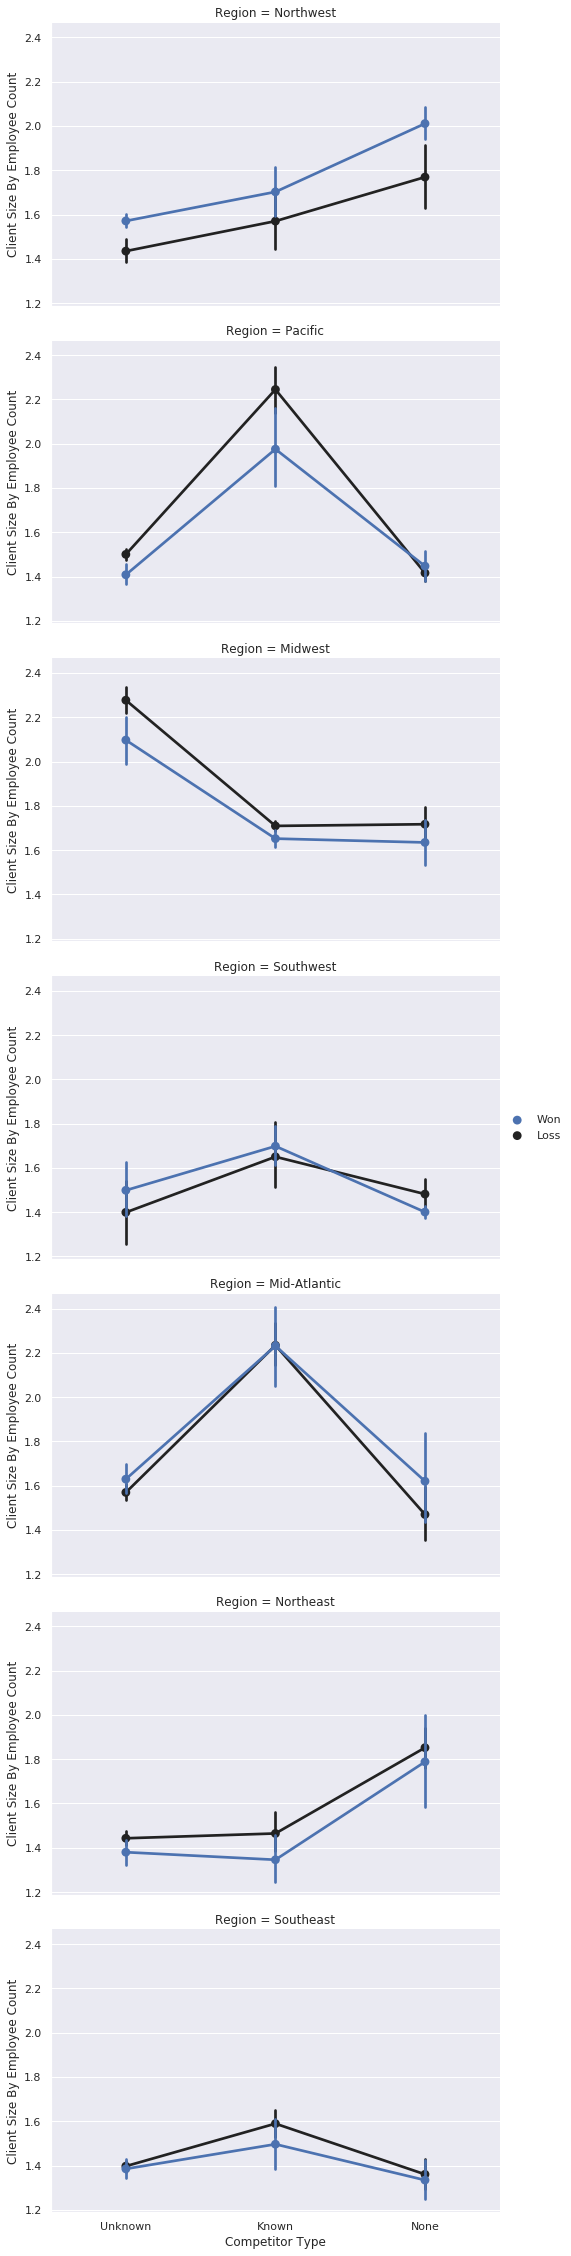

In [50]:
FacetGrid = sns.FacetGrid(sales_data_original, row= 'Region', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Competitor Type', 'Client Size By Employee Count', 'Opportunity Result', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

### Tỷ lệ giữa số cơ hội thành công và thất bại theo khu vực, được sắp xếp theo số đô la chi tiêu

Text(0.5, 1.0, 'Region 6')

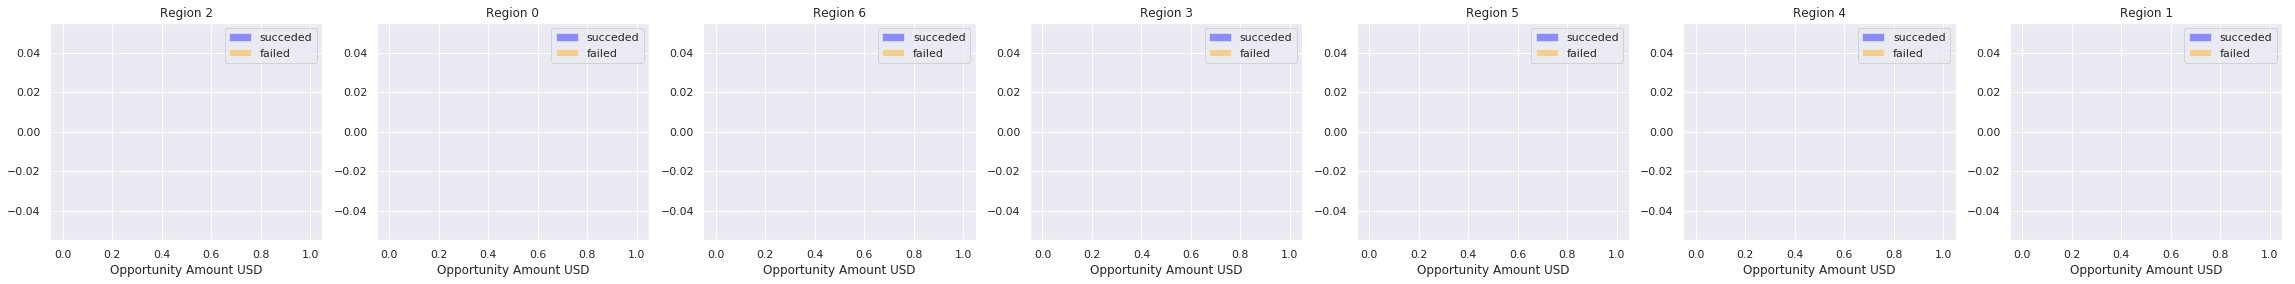

In [51]:
survived = 'succeded'
not_survived = 'failed'


fig, axes = plt.subplots(nrows=1, ncols=7,figsize=(40, 4))
reg0 = sales_data[sales_data['Region'] == 0]
reg1 = sales_data[sales_data['Region'] == 1]
reg2 = sales_data[sales_data['Region'] == 2]
reg3 = sales_data[sales_data['Region'] == 3]
reg4 = sales_data[sales_data['Region'] == 4]
reg5 = sales_data[sales_data['Region'] == 5]
reg6 = sales_data[sales_data['Region'] == 6]


reg0[reg0['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg0[reg0['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[1], kde =False)
ax = sns.distplot(reg0[reg0['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[1], kde =False)
ax.legend()
ax.set_title('Region 0')


reg1[reg1['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg1[reg1['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[6], kde =False)
ax = sns.distplot(reg1[reg1['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[6], kde =False)
ax.legend()
ax.set_title('Region 1')


reg2[reg2['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg2[reg2['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[0], kde =False)
ax = sns.distplot(reg2[reg2['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Region 2')


reg3[reg3['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg3[reg3['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[3], kde =False)
ax = sns.distplot(reg3[reg3['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[3], kde =False)
ax.legend()
ax.set_title('Region 3')


reg4[reg4['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg4[reg4['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[5], kde =False)
ax = sns.distplot(reg4[reg4['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[5], kde =False)
ax.legend()
ax.set_title('Region 4')


reg5[reg5['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg5[reg5['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[4], kde =False)
ax = sns.distplot(reg5[reg5['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[4], kde =False)
ax.legend()
ax.set_title('Region 5')


reg6[reg6['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg6[reg6['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[2], kde =False)
ax = sns.distplot(reg6[reg6['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[2], kde =False)
ax.legend()
ax.set_title('Region 6')


### Chuyển đổi các biến phân loại thành số

In [52]:
le = LabelEncoder()

sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])

sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


In [53]:
numeric_features = sales_data.select_dtypes(include=[np.number])
numeric_features.dtypes

Opportunity Number                           int64
Supplies Subgroup                            int64
Supplies Group                               int64
Region                                       int64
Route To Market                              int64
Elapsed Days In Sales Stage                  int64
Opportunity Result                           int64
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                              int64
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

In [54]:
corr = numeric_features.corr()

print (corr['Opportunity Result'].sort_values(ascending=False)[:10], '\n')
print (corr['Opportunity Result'].sort_values(ascending=False)[-10:])

Opportunity Result                    1.000000
Revenue From Client Past Two Years    0.277688
Ratio Days Qualified To Total Days    0.208131
Sales Stage Change Count              0.092017
Route To Market                       0.081942
Opportunity Number                    0.042167
Competitor Type                      -0.003661
Elapsed Days In Sales Stage          -0.016561
Client Size By Revenue               -0.017341
Client Size By Employee Count        -0.019456
Name: Opportunity Result, dtype: float64 

Client Size By Employee Count             -0.019456
Supplies Group                            -0.026049
Region                                    -0.030763
Supplies Subgroup                         -0.035639
Opportunity Amount USD                    -0.075764
Ratio Days Validated To Total Days        -0.172233
Deal Size Category                        -0.192270
Ratio Days Identified To Total Days       -0.201432
Total Days Identified Through Closing     -0.262864
Total Days Identifi

### Ma trận tương quan

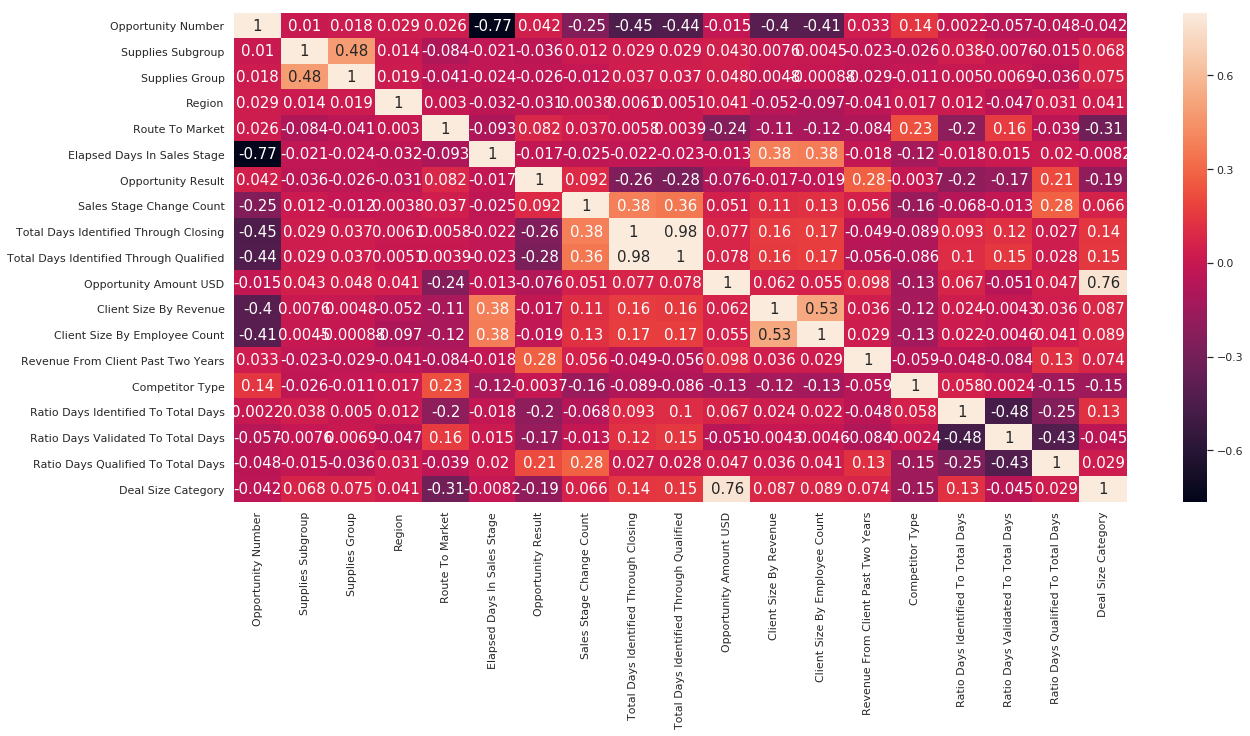

In [55]:
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 15}, annot=True);


### Bộ đào tạo và bộ kiểm tra

In [56]:
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]

data = sales_data[cols]
target = sales_data['Opportunity Result']

data.head(2)

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1


### Tách tập dữ liệu thành đào tạo và kiểm tra

In [0]:
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)


### Xây dựng mô hình - Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#create an object of the type GaussianNB
start = time.time()
gnb = GaussianNB()

pred = gnb.fit(data_train, target_train).predict(data_test)

acc_gaussian = round(accuracy_score(target_test, pred, normalize = True)*100, 2)
end = time.time()

print("Độ chính xác Naive-Bayes : ",acc_gaussian, "%")
print("Thời gian chạy: ", end - start, "giây")

Naive-Bayes accuracy :  75.91 %
Tempo de Execução: 0.03448081016540527 segundos


### Xây dựng mô hình - Random Forest

In [59]:
#A floresta construída é um conjunto de árvores de decisão na maioria das vezes treinadas pelo método "bagging". A ideia geral desse método é que uma combinação de modelos de aprendizagem aumentem o resultado geral.
start = time.time()
random_forest = RandomForestClassifier()
pred = random_forest.fit(data_train, target_train).predict(data_test)

#print the accuracy score of the model Random Forest
acc_random_forest = round(accuracy_score(target_test, pred, normalize = True)*100, 2)
end = time.time()

print("Độ chính xác Random Forest :", acc_random_forest, "%")
print("Thời gian chạy:", end - start, "giây")

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest accuracy : 86.68 %
Tempo de Execução: 1.1107161045074463 segundos


### Xây dựng mô hình - Logistic Regression

In [60]:
#Esta técnica tem como objetivo produzir, a partir de observações, um modelo que permita a predição de valores tomados por uma variável categórica (Frequentemente binárias). 
start = time.time()
logreg = LogisticRegression()

#print the accuracy score of the model Logistic Regression
pred = logreg.fit(data_train, target_train).predict(data_test)
acc_log = round(accuracy_score(target_test, pred, normalize = True)*100, 2)
end = time.time()

print("Độ chính xác Logistic Regression :", acc_log, "%")
print("Thời gian chạy:", end - start, "giây")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression accuracy : 77.18 %
Tempo de Execução: 0.37973976135253906 segundos


### Xây dựng mô hình - Stochastic Gradient

In [61]:
# Implementa uma rotina de aprendizado de descida de gradiente estocástica simples que suporta diferentes funções de perda e penalidades para classificação.
start = time.time()
sgd = linear_model.SGDClassifier(tol=None)
sgd.fit(data_train, target_train)
Y_pred = sgd.predict(data_test)

sgd.score(data_train, target_train)

acc_sgd = round(sgd.score(data_train, target_train) * 100, 2)
end = time.time()

print (" Độ chính xác Stochastic Gradient Decent: ",acc_sgd, "%")
print("Thời gian chạy:", end - start, "segundos")

Stochastic Gradient Decent accuracy:  76.84 %
Tempo de Execução: 6.091109991073608 segundos


### Xây dựng mô hình - Support Vector Machines


In [62]:
start = time.time()
linear_svc = LinearSVC()
linear_svc.fit(data_train, target_train)

Y_pred = linear_svc.predict(data_test)

acc_linear_svc = round(linear_svc.score(data_train, target_train) * 100, 2)
end = time.time()

print ("Hỗ trợ Máy Vector: ",acc_linear_svc, "%")
print("Thời gian chạy:", end - start, "giây")

Support Vector Machines:  51.6 %
Tempo de Execução: 12.477275133132935 segundos


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Xây dựng mô hình - KNN


In [63]:
start = time.time()

knn = KNeighborsClassifier()
knn.fit(data_train, target_train)
Y_pred = knn.predict(data_test)

acc_knn = round(knn.score(data_train, target_train) * 100, 2)
end = time.time()

print ("KNN: ",acc_knn, "%")
print("Thời gian chạy:", end - start, "giây")

KNN:  86.58 %
Tempo de Execução: 3.965852975845337 segundos


### Xây dựng mô hình - Perceptron


In [64]:
start = time.time()
perceptron = Perceptron(max_iter=2000)
perceptron.fit(data_train, target_train)

Y_pred = perceptron.predict(data_test)

acc_perceptron = round(perceptron.score(data_train, target_train) * 100, 2)
end = time.time()

print ("Perceptron: ",acc_perceptron, "%")
print("Thời gian chạy:", end - start, "giây")

Perceptron:  75.43 %
Tempo de Execução: 0.09813237190246582 segundos


### Xây dựng mô hình - Decision Tree


In [65]:
start = time.time()
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(data_train, target_train)  
Y_pred = decision_tree.predict(data_test)  

acc_decision_tree = round(decision_tree.score(data_train, target_train) * 100, 2)
end = time.time()

print ("Decision Tree: ",acc_decision_tree, "%")
print("Thời gian chạy:", end - start, "giây")

Decision Tree:  99.97 %
Tempo de Execução: 0.5719470977783203 segundos


### kết quả

In [66]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
86.68,Random Forest
86.58,KNN
77.18,Logistic Regression
76.84,Stochastic Gradient Decent
75.91,Naive Bayes
75.43,Perceptron
51.60,Support Vector Machines


In [67]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
scores = cross_val_score(rf, data_train, target_train, cv=10, scoring = "accuracy")
results = pd.DataFrame({"Điểm:":scores, 
                        "Ý nghĩa:":scores.mean(), 
                        "Độ lệch chuẩn:":scores.std()})


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [68]:
importances = pd.DataFrame({'feature':data_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Opportunity Amount USD,0.124
Elapsed Days In Sales Stage,0.118
Total Days Identified Through Closing,0.113
Revenue From Client Past Two Years,0.108
Total Days Identified Through Qualified,0.081
Ratio Days Qualified To Total Days,0.075
Sales Stage Change Count,0.073
Ratio Days Validated To Total Days,0.050
Region,0.046


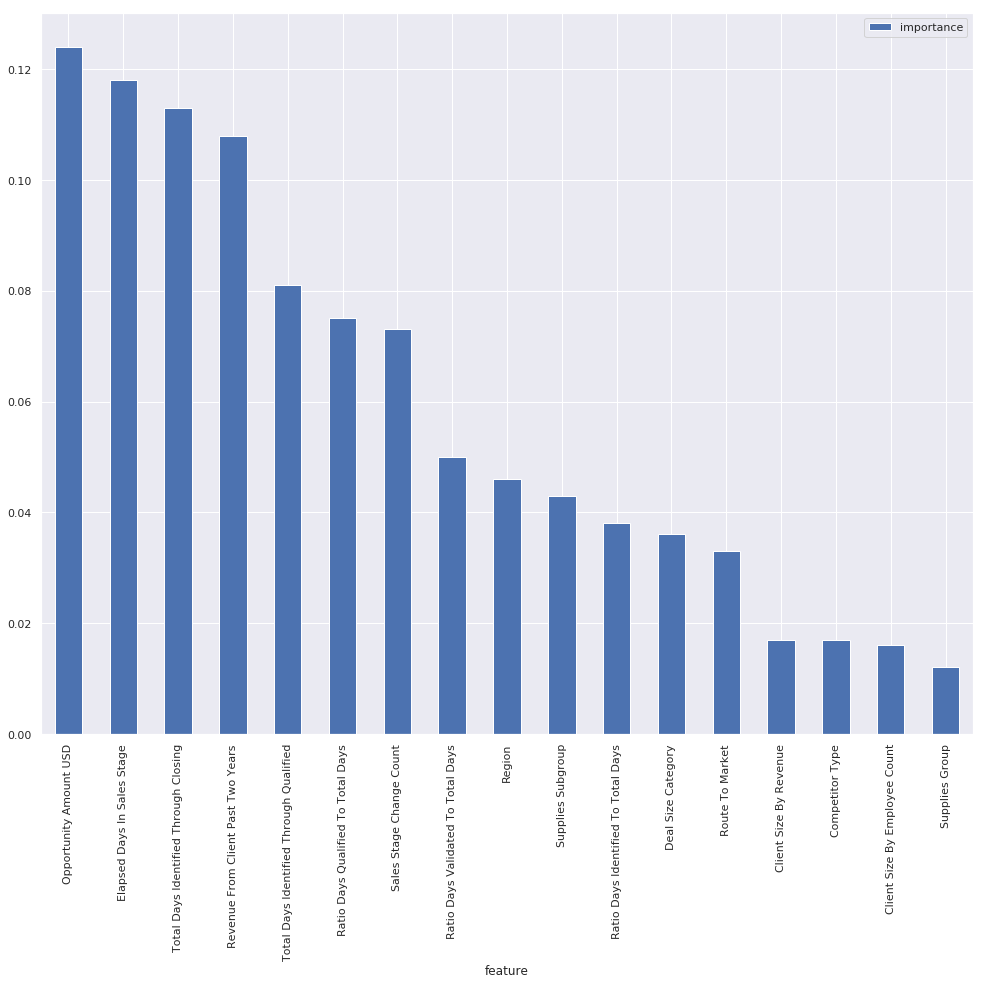

In [69]:
importances.plot.bar()

In [0]:
train_df  = data_train.drop("Client Size By Employee Count", axis=1)
test_df  = data_test.drop("Client Size By Employee Count", axis=1)

train_df  = train_df.drop("Competitor Type", axis=1)
test_df  = test_df.drop("Competitor Type", axis=1)

In [71]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(data_train, target_train)
Y_prediction = random_forest.predict(data_train)

random_forest.score(data_train, target_train)

acc_random_forest = round(random_forest.score(data_train, target_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.97 %
99.97 %


In [72]:
print("OOB SCORE:", round(random_forest.oob_score_, 4)*100, "%")


OOB SCORE: 87.83 %
OOB SCORE: 87.83999999999999 %


In [0]:
# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
# from sklearn.model_selection import GridSearchCV, cross_val_score
# rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
# clf.fit(data_train, target_train)
# clf.bestparams

In [74]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(data_train, target_train)
Y_prediction = random_forest.predict(data_test)

random_forest.score(data_train, target_train)

print("OOB SCORE:", round(random_forest.oob_score_, 4)*100, "%")

OOB SCORE: 88.11 %
OOB SCORE: 88.11 %


In [75]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, data_train, target_train, cv=3)
confusion_matrix(target_train, predictions)

array([[40024,  2308],
       [ 4324,  7961]])

array([[40024,  2308],
       [ 4324,  7961]])

In [76]:
from sklearn.metrics import precision_score, recall_score

print("Độ chính xác: %.3f" % precision_score(target_train, predictions))
print("Gọi lại: %.3f" % recall_score(target_train, predictions))

Precision: 0.775
Recall: 0.648
Precision: 0.775
Recall: 0.648


In [77]:
from sklearn.metrics import f1_score
print ("%.3f" % f1_score(target_train, predictions))

0.706
0.706


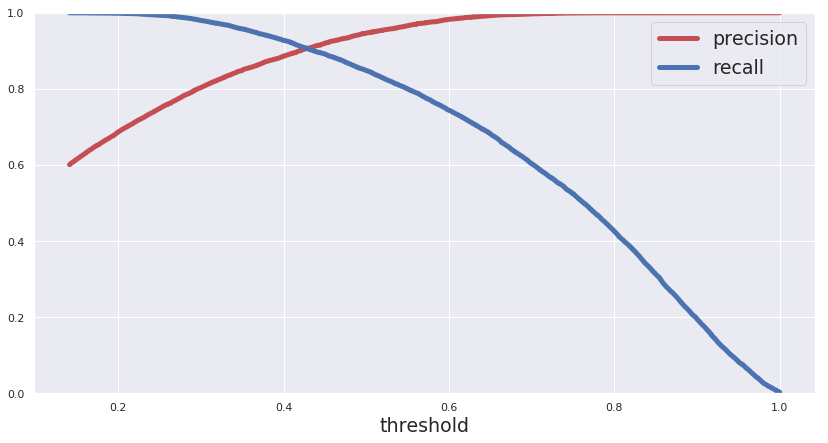

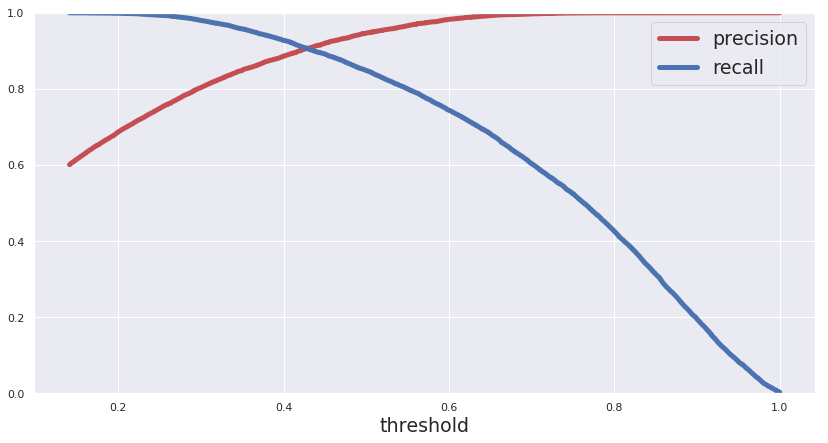

In [78]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(data_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(target_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

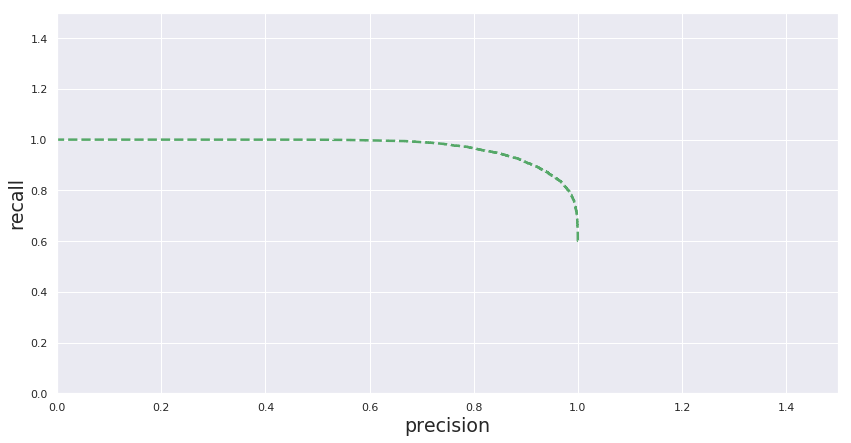

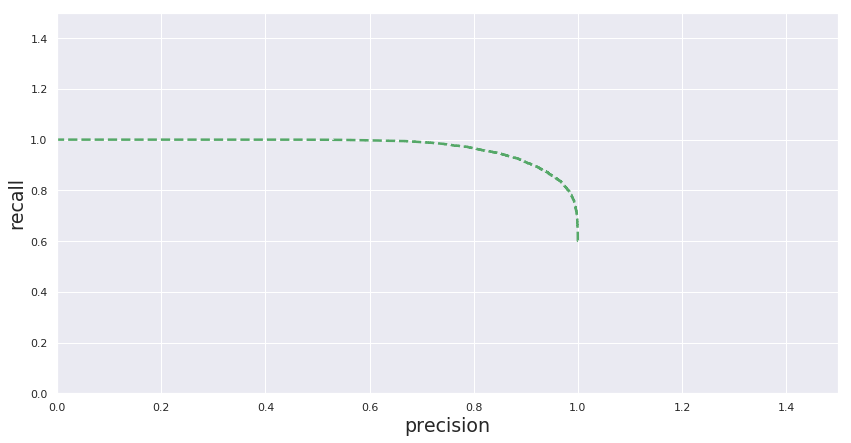

In [79]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

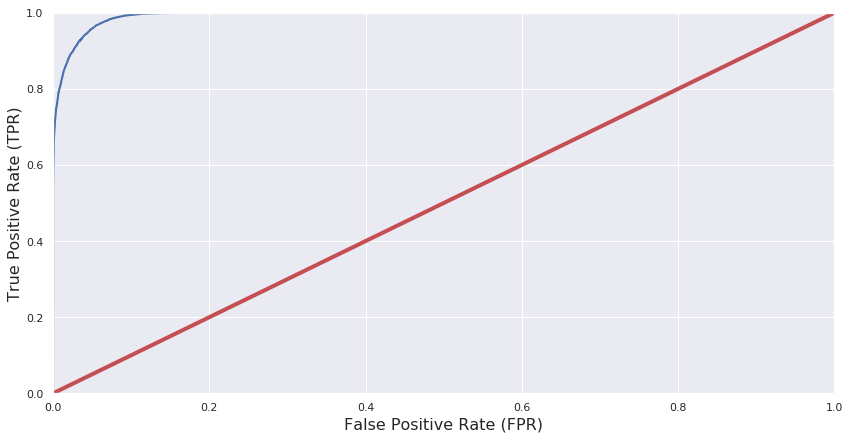

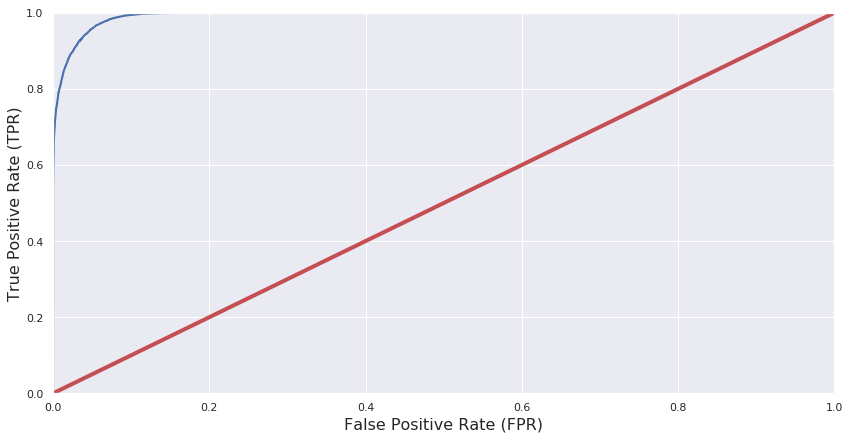

In [80]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [81]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(target_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9926838331000667
ROC-AUC-Score: 0.9926838331000667
